In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [5]:
df1 = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [6]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [7]:
df['fuel_efficiency_mpg']

0       13.231729
1       13.688217
2       14.246341
3       16.912736
4       12.488369
          ...    
9699    15.101802
9700    17.962326
9701    17.186587
9702    15.331551
9703    14.884467
Name: fuel_efficiency_mpg, Length: 9704, dtype: float64

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

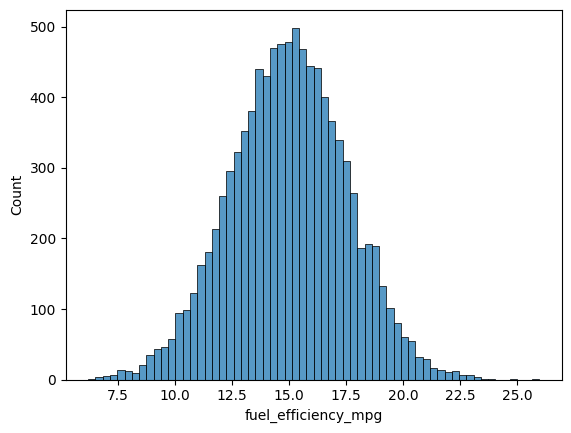

In [8]:
sns.histplot(df['fuel_efficiency_mpg'])

In [9]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [10]:
df['horsepower'].median()

np.float64(149.0)

In [11]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [12]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)
n

9704

In [13]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [14]:
idx = np.arange(n)

In [15]:
np.random.seed(42)
np.random.shuffle(idx)

In [16]:
df_train = df.iloc[idx[: n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val :]]
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


In [17]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
len(y_val)

1940

In [20]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [21]:
base = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year']
base

['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [22]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [23]:
X_train = df_train[base].values
df_train_0 = df_train[base]
X_train_0 = df_train_0.fillna(0).values
X_train_mean = df_train_0.fillna(df_train_0['horsepower'].mean()).values



X_train_mean

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [24]:
w0_0, w_0 = train_linear_regression(X_train_0, y_train)
y_pred_0 = w0_0 + X_train_0.dot(w_0)

w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w0_mean + X_train_mean.dot(w_mean)

In [25]:
w0_0, w0_mean

(np.float64(28.827365475106156), np.float64(28.925259952113596))

In [26]:
w_0, w_mean

(array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992869e-04]),
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

<Axes: ylabel='Count'>

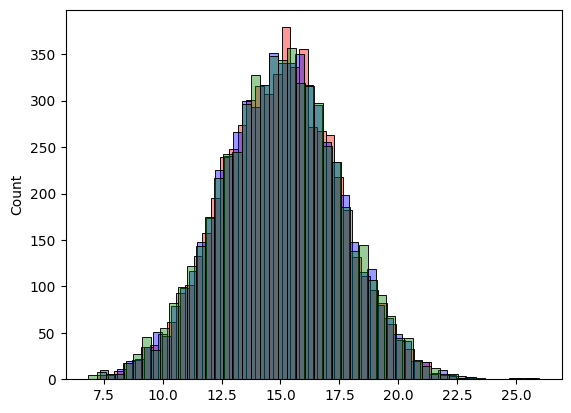

In [27]:
sns.histplot(y_pred_0, color='red', alpha=0.4)
sns.histplot(y_pred_mean, color='blue', alpha=0.4)
sns.histplot(y_train, color='green', alpha=0.4)

In [28]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [29]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [30]:
def prepare_X(df, val):
    df_num = df[base]
    df_num = df_num.fillna(val)
    X = df_num.values
    return X

In [31]:
X_val_0 = prepare_X(df_val, 0)
X_val_mean = prepare_X(df_val, df_val['horsepower'].mean())

y_pred_0 = w0_0 + X_val_0.dot(w_0)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

rmse_0 = rmse(y_val, y_pred_0)
rmse_mean = rmse(y_val, y_pred_mean)
round(rmse_0, 2), round(rmse_mean, 2)

(np.float64(0.52), np.float64(0.46))

In [32]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [44]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train_0, y_train, r=r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 22.320182147425804 2.5663631784395244
0.01 19.30011837279501 2.566938366173433
0.1 8.702538132770865 2.569272047183869
1 1.3407235213026507 2.5711815318013787
5 0.281683474164984 2.5714756487623656
10 0.14173789053626673 2.5715148943751505
100 0.014258519461335668 2.5715510036647116


In [34]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_preds = {}
y_vals = {}
for _ in seed:
    np.random.seed(_)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[: n_train]]
    df_val = df.iloc[idx[n_train : n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val :]]
    y_train = df_train.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    y_preds['y_pred_%d' % _] = y_pred
    y_vals['y_val_%d' % _] = y_val

In [43]:
def calculate_rmse(a, b):
    c = a - b
    c_square = c ** 2
    c_mean = c_square.mean()
    rmse = np.sqrt(c_mean)
    return rmse


calculate_rmse(y_preds['y_pred_0'], y_vals['y_val_0'])

y_preds, y_vals

({'y_pred_0': array([19.28904531, 15.90110339, 12.25729793, ..., 13.91928775,
         16.12591323, 14.24851426], shape=(1940,)),
  'y_pred_1': array([18.49553381, 17.51552182, 13.72238127, ..., 16.87456413,
         16.5171127 , 14.39316535], shape=(1940,)),
  'y_pred_2': array([14.77961099, 14.05695572, 13.80712701, ...,  7.8493782 ,
         15.53051387, 12.90415423], shape=(1940,)),
  'y_pred_3': array([16.48869269, 16.68242414, 17.32160796, ..., 15.66823456,
         17.67183561, 18.93643457], shape=(1940,)),
  'y_pred_4': array([16.30505603, 19.3201044 , 16.4885866 , ..., 13.19519641,
         19.25017427, 13.98536065], shape=(1940,)),
  'y_pred_5': array([12.65065166, 14.15814439, 14.84774997, ..., 16.97224467,
         17.15206542, 20.01911262], shape=(1940,)),
  'y_pred_6': array([13.13764338, 17.91768604, 15.28102728, ..., 13.62130091,
         14.94271299, 16.37886558], shape=(1940,)),
  'y_pred_7': array([14.89248564, 17.11401015, 15.18514092, ..., 15.17576091,
         12.

In [36]:
ramses = []
for i in range (10):
    ramses.append(calculate_rmse(y_preds['y_pred_%d' % i], y_vals['y_val_%d' % i]))
ramses

[np.float64(0.5155264762371528),
 np.float64(0.5158252979059069),
 np.float64(0.5128324892991545),
 np.float64(0.5084930311177169),
 np.float64(0.5094209022036666),
 np.float64(0.5301284975738542),
 np.float64(0.5142267107582312),
 np.float64(0.5124852802249587),
 np.float64(0.5082885728860057),
 np.float64(0.5053325213824887)]

In [37]:
round(np.std(ramses), 3)

np.float64(0.007)

In [38]:
np.random.seed(9)
np.random.shuffle(idx)
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train, 0)
X_full_train

array([[ 280.        ,  174.        , 2797.99179256, 2016.        ],
       [ 250.        ,  118.        , 3715.68947508, 2016.        ],
       [ 170.        ,  105.        , 2336.20460314, 2008.        ],
       ...,
       [ 220.        ,  101.        , 2830.4058604 , 2006.        ],
       [ 120.        ,  146.        , 2851.8003925 , 2007.        ],
       [ 200.        ,  177.        , 3211.06982491, 2014.        ]],
      shape=(7764, 4))

In [39]:
y_full_train = np.concatenate([y_train, y_val])

In [40]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [41]:
X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)

In [42]:
score = calculate_rmse(y_test, y_pred)
score

np.float64(0.5236231606260219)